In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay, ConfusionMatrixDisplay, accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
np.random.seed(42)

In [3]:
n = 300

age = np.random.randint(18, 65, n)
fitness = np.random.choice(['low', 'medium', 'high'], n)
weapon = np.random.randint(0, 2, size = n)
panic = np.random.rand(n)
group = np.random.randint(1, 11, n)

In [4]:
survival_score = ((weapon * 0.4) + ((group > 3) * 0.2) + ((fitness == 'high') * 0.3) + ((panic < 5) * 0.2) - ((age > 55) * 0.2))
survived = (survival_score > 0.5).astype(int)

In [5]:
df = pd.DataFrame({
    'Age': age,
    'Fitness': fitness,
    'Weapon': weapon,
    'Panic': panic,
    'group': group,
    'Survived': survived
})

df.head()

,Age,Fitness,Weapon,Panic,group,Survived
0,56,low,0,0.396543,2,0
1,46,medium,0,0.622087,1,0
2,32,low,1,0.862364,7,1
3,60,high,1,0.949521,7,1
4,25,high,0,0.147073,2,0


In [6]:
fitness_map = {
    "low": 1,
    "medium": 2,
    "high": 3
}

df["Fitness"] = df["Fitness"].map(fitness_map)
df.head()

,Age,Fitness,Weapon,Panic,group,Survived
0,56,1,0,0.396543,2,0
1,46,2,0,0.622087,1,0
2,32,1,1,0.862364,7,1
3,60,3,1,0.949521,7,1
4,25,3,0,0.147073,2,0


In [7]:
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(240, 5) (60, 5) (240,) (60,)


In [8]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=4)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [9]:
accuracy_score(y_test, y_pred)

1.0

In [10]:
roc_auc_score(y_test, y_pred)

np.float64(1.0)

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        31

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



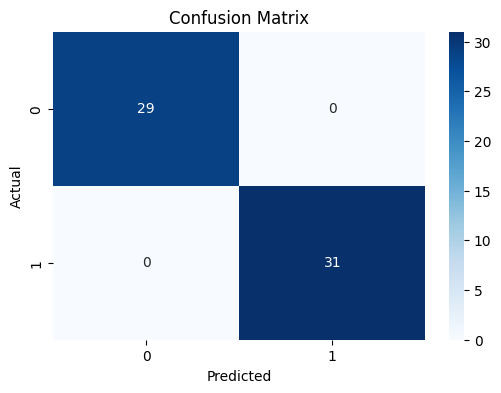

In [12]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


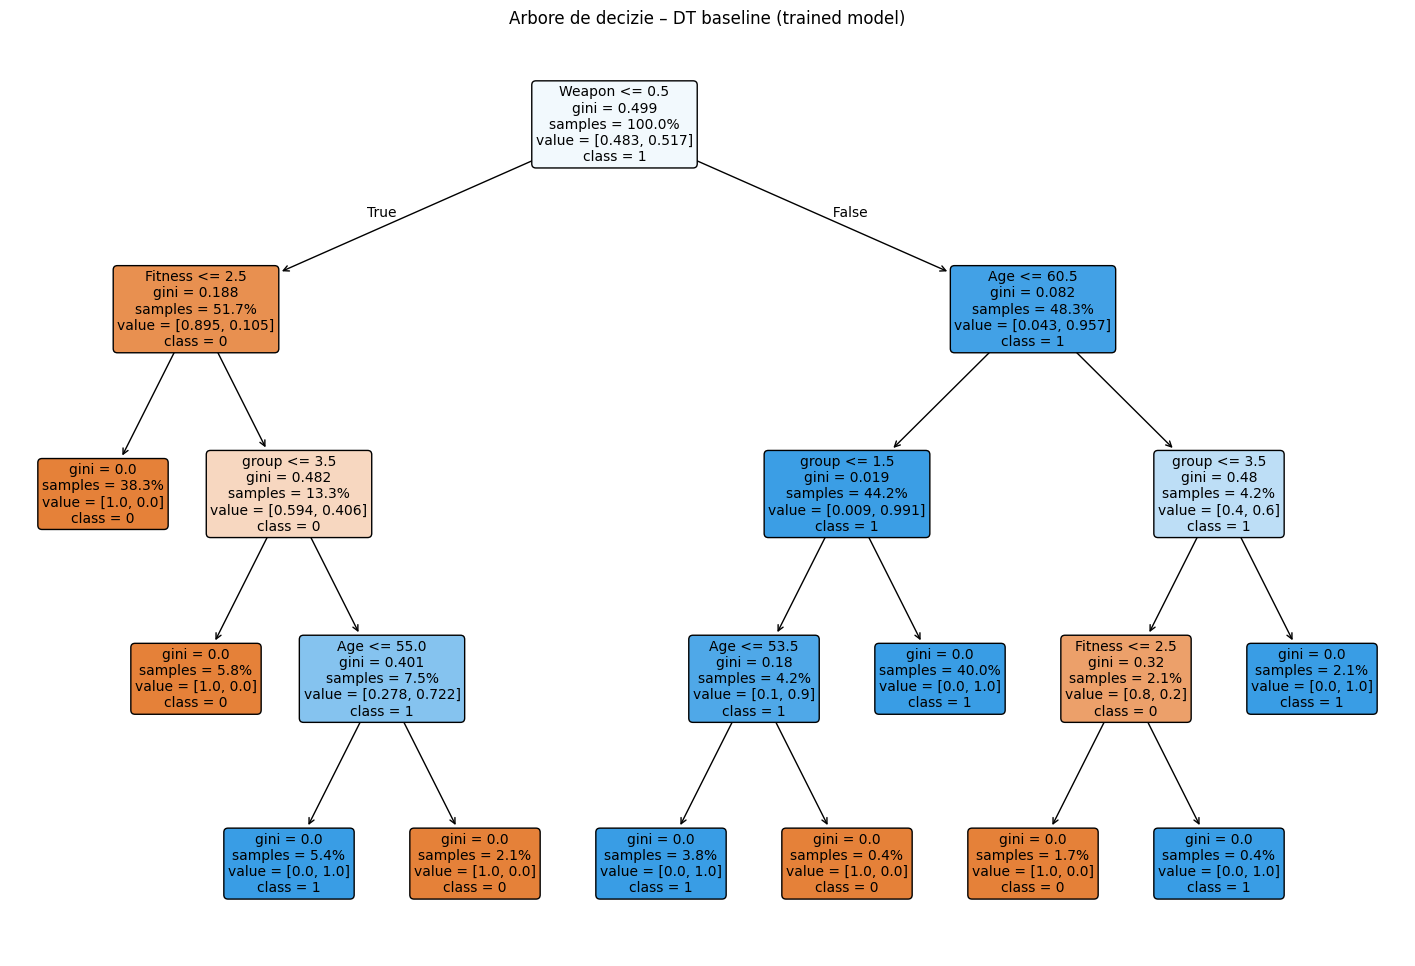

In [23]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 12))
plot_tree(
    dt,
    feature_names=list(X_train.columns),
    class_names=[str(c) for c in dt.classes_],
    filled=True,
    rounded=True,
    proportion=True,
    impurity=True,
    fontsize=10,
    max_depth=4,
)
plt.title("Arbore de decizie – DT baseline (trained model)")
plt.show()

In [29]:
X_random = df.drop(columns=['Survived'])
y_random = df['Survived']
X_random_train, X_random_test, y_random_train, y_random_test = train_test_split(X_random, y_random, test_size=0.2, random_state=42)

print(X_random_train.shape, X_random_test.shape, y_random_train.shape, y_random_test.shape)

(240, 5) (60, 5) (240,) (60,)


In [30]:
dt_random = RandomForestClassifier(oob_score = True, random_state = 42)
dt_random.fit(X_random_train, y_random_train)
dt.fit(X_random_train, y_random_train)
y_pred = dt.predict(X_random_test)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        31

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



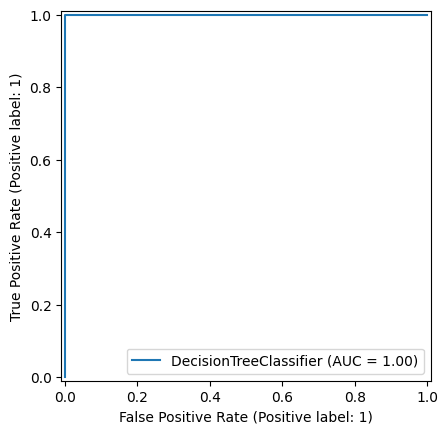

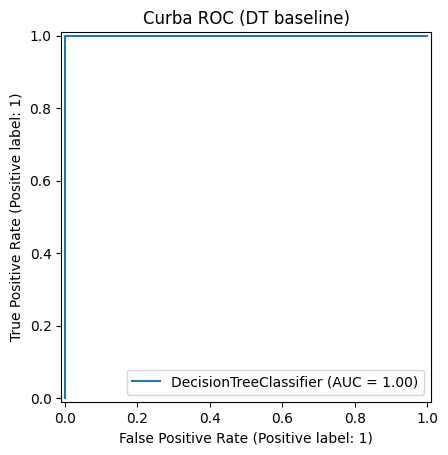

In [35]:
y_score = dt.predict_proba(X_test)[:1]
y_random_score = dt_random.predict_proba(X_random_test)[:1]

RocCurveDisplay.from_estimator(dt, X_test, y_test)
RocCurveDisplay.from_estimator(dt, X_random_test, y_random_test)
plt.title("Curba ROC (DT baseline)")
plt.show()